<a href="https://colab.research.google.com/github/amigodrakea/IA/blob/main/Lab7/Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Girafa, aviãavião e satelite

In [ ]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt

Girafa

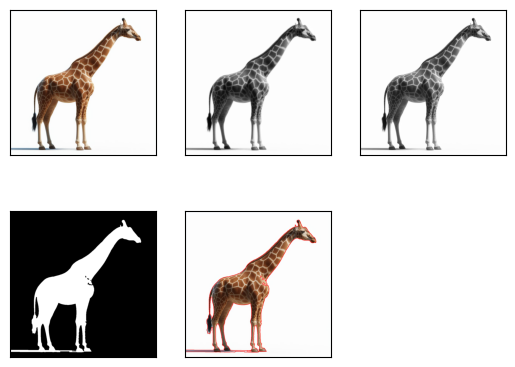

In [ ]:
#Importa e converta para RGB
img = cv2.imread('GIRAFA.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)



#Convertendo para preto e branco (RGB -> Gray Scale -> BW)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
a = img_gray.max()



tamanhoKernel = 5
kernel = np.ones((tamanhoKernel,tamanhoKernel), np.uint8)


#Filtro de ruído (bluring)
img_blur = cv2.blur(img_gray, ksize=(tamanhoKernel,tamanhoKernel))

# Detecção borda com Canny (sem blurry)
# Detecção borda com Canny (com blurry)
edges_blur = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)



# contorno
contours, hierarchy = cv2.findContours(
                                   image = edges_blur,
                                   mode = cv2.RETR_TREE,
                                   method = cv2.MORPH_CLOSE)
contours = sorted(contours, key = cv2.contourArea, reverse = True)
img_copy = img.copy()
final = cv2.drawContours(img_copy, contours, contourIdx = -1,
                         color = (255, 0, 0), thickness = 2)


#plot imagens
imagens = [img,img_blur,img_gray,edges_blur,final]
formatoX = math.ceil(len(imagens)**.5)
if (formatoX**2-len(imagens))>formatoX:
    formatoY = formatoX-1
else:
    formatoY = formatoX
for i in range(len(imagens)):
    plt.subplot(formatoY, formatoX, i + 1)
    plt.imshow(imagens[i],'gray')
    plt.xticks([]),plt.yticks([])
plt.show()

Avião

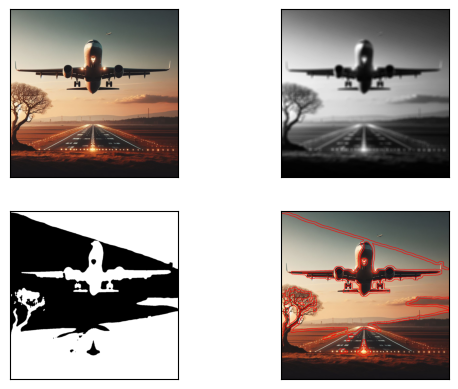

In [ ]:
#Importa e converta para RGB
img = cv2.imread('Aviao.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)



#Convertendo para preto e branco (RGB -> Gray Scale -> BW)
img_gray = cv2.cvtColor(cv2.blur(img,(18,18)), cv2.COLOR_RGB2GRAY)
a = img_gray.max()
_, thresh = cv2.threshold(img_gray, a/2*1, a,cv2.THRESH_BINARY_INV)
img_grad = cv2.morphologyEx(thresh, cv2.MORPH_GRADIENT, kernel)


# contorno
contours, hierarchy = cv2.findContours(
                                   image = img_grad,
                                   mode = cv2.RETR_TREE,
                                   method = cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key = cv2.contourArea, reverse = True)
img_copy = img.copy()
final = cv2.drawContours(img_copy, contours, contourIdx = -1,
                         color = (255, 0, 0), thickness = 2)


#plot imagens
imagens = [img,img_gray,thresh,final]
formatoX = math.ceil(len(imagens)**.5)
if (formatoX**2-len(imagens))>formatoX:
    formatoY = formatoX-1
else:
    formatoY = formatoX
for i in range(len(imagens)):
    plt.subplot(formatoY, formatoX, i + 1)
    plt.imshow(imagens[i],'gray')
    plt.xticks([]),plt.yticks([])
plt.show()

Satelite

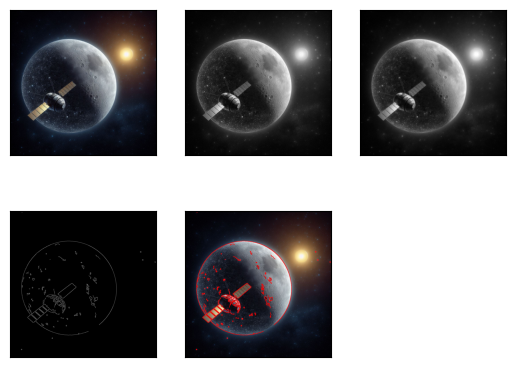

In [24]:
img = cv2.imread('Satelite.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
a = img_gray.max()
_, thresh = cv2.threshold(img_gray, a/2+100, a,cv2.THRESH_BINARY_INV)


tamanhoKernel =5
img_blur = cv2.blur(img_gray, ksize=(tamanhoKernel,tamanhoKernel))
edges_blur = cv2.Canny(image=cv2.blur(img_blur,(5,5)), threshold1=a/3, threshold2=a/20)


contours, hierarchy = cv2.findContours(
                                   image = edges_blur,
                                   mode = cv2.RETR_TREE,
                                   method = cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key = cv2.contourArea, reverse = True)
img_copy = img.copy()
final = cv2.drawContours(img_copy, contours, contourIdx = -1,
                         color = (255, 0, 0), thickness = 2)

imagens = [img, img_gray, img_blur, edges_blur, final]
formatoX = math.ceil(len(imagens)**.5)
if (formatoX**2-len(imagens))>formatoX:
    formatoY = formatoX-1
else:
    formatoY = formatoX
for i in range(len(imagens)):
    plt.subplot(formatoY, formatoX, i + 1)
    plt.imshow(imagens[i],'gray')
    plt.xticks([]),plt.yticks([])
plt.show()